In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support

In [2]:
data = pd.read_csv("C:\\Users\\PUSHKARINEE BAPATHU\\Downloads\\Fraud.csv") 

In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   step             1048575 non-null  int64  
 1   type             1048575 non-null  object 
 2   amount           1048575 non-null  float64
 3   nameOrig         1048575 non-null  object 
 4   oldbalanceOrg    1048575 non-null  float64
 5   newbalanceOrg    1048575 non-null  float64
 6   nameDest         1048575 non-null  object 
 7   oldbalanceDest   1048575 non-null  float64
 8   newbalanceDest   1048575 non-null  float64
 9   isFraud          1048575 non-null  int64  
 10  isFlaggedFraud   1048575 non-null  int64  
 11  hour             1048575 non-null  int64  
 12  day              1048575 non-null  int64  
 13  nameOrig_length  1048575 non-null  int64  
 14  nameDest_length  1048575 non-null  int64  
 15  type_encoded     1048575 non-null  int32  
dtypes: float64(5), int

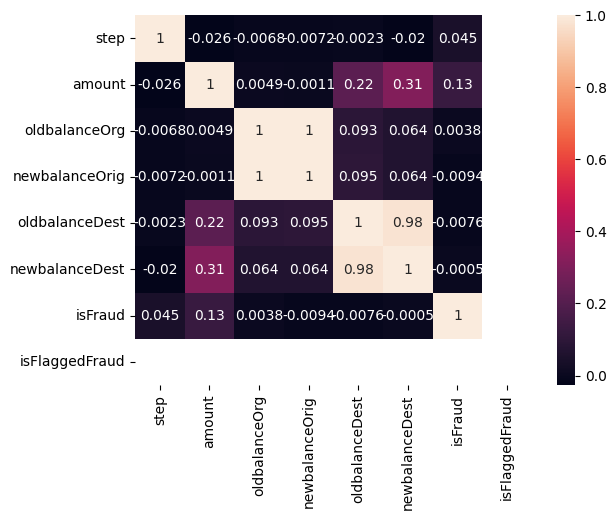

In [6]:
numerical_cols = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [31]:
missing_values = data.isnull().sum()
missing_values

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrg      0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
hour               0
day                0
nameOrig_length    0
nameDest_length    0
type_encoded       0
dtype: int64

In [32]:
# Duplicated row
duplicated = data.duplicated().sum()
duplicated

0

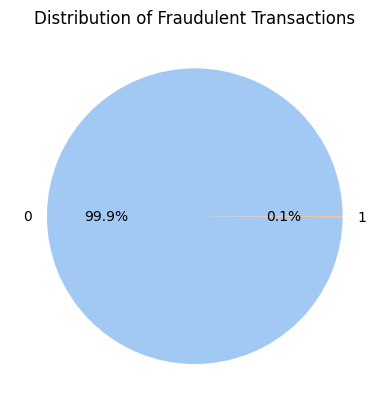

In [33]:
colors = sns.color_palette("pastel")

data['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=colors)
plt.ylabel('')  # This removes the 'isFraud' label on the y-axis
plt.title('Distribution of Fraudulent Transactions')
plt.show()

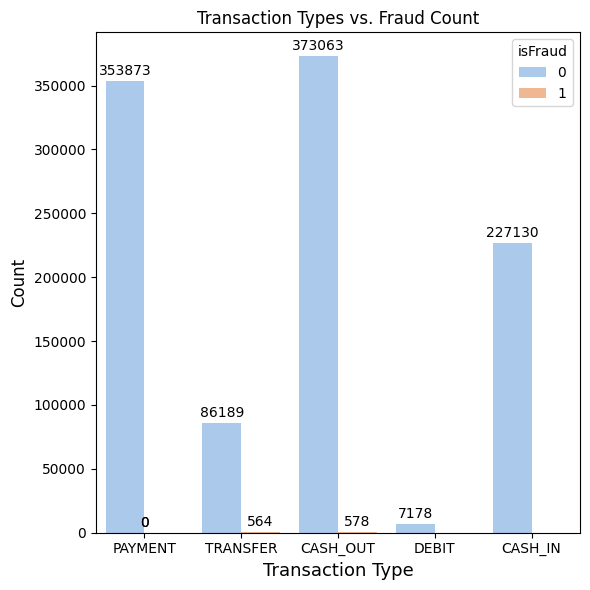

In [34]:

plt.figure(figsize=(6, 6))
ax = sns.countplot(x='type', data=data, hue='isFraud', palette='pastel')


plt.title('Transaction Types vs. Fraud Count', fontsize=12)
plt.xlabel('Transaction Type', fontsize=13)
plt.ylabel('Count', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):  
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 7),  
                    textcoords='offset points')

plt.tight_layout()
plt.show()

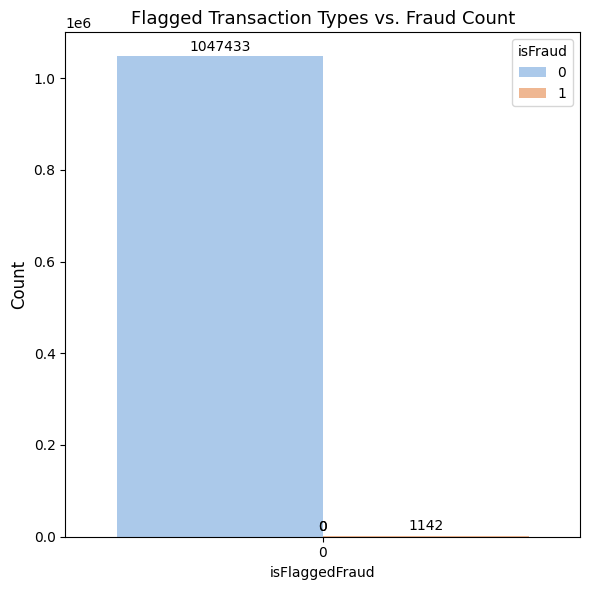

In [35]:
flagged_data = data.loc[data['isFlaggedFraud']==1]

plt.figure(figsize=(6, 6))
ax = sns.countplot(x='isFlaggedFraud', data=data, hue='isFraud', palette='pastel')

plt.title('Flagged Transaction Types vs. Fraud Count', fontsize=13)
plt.ylabel('Count', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):  
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 7), 
                    textcoords='offset points')

plt.tight_layout()
plt.show()

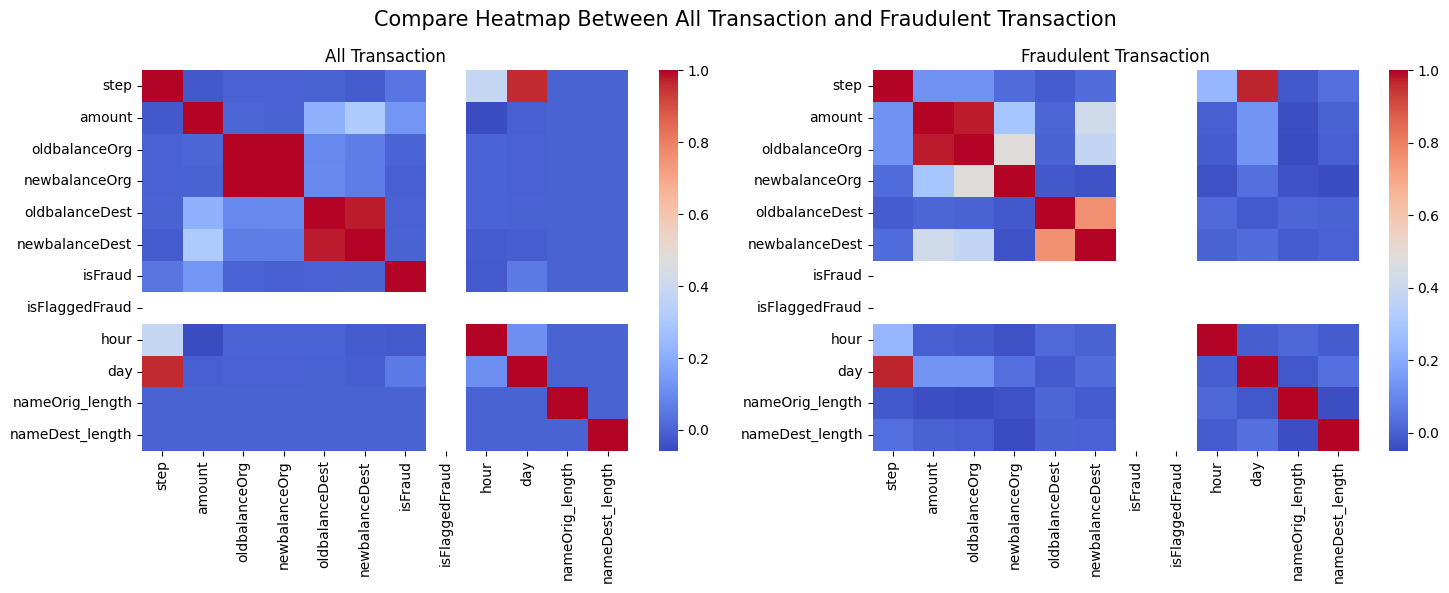

In [36]:
temp = data.select_dtypes(include=['float64', 'int64'])
corr_data = temp.corr()
# Compute the correlation matrix for 'fraudulent_transaction' dataframe
fraudulent_transaction = temp.loc[data['isFraud']==1]
corr_fraudulent = fraudulent_transaction.corr()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for 'data' dataframe
sns.heatmap(corr_data, annot=False, fmt=".2f", cmap='coolwarm', ax=ax[0])
ax[0].set_title("All Transaction", fontsize=12)

# Heatmap for 'fraudulent_transaction' dataframe
sns.heatmap(corr_fraudulent, annot=False, fmt=".2f", cmap='coolwarm', ax=ax[1])
ax[1].set_title("Fraudulent Transaction", fontsize=12)

fig.suptitle('Compare Heatmap Between All Transaction and Fraudulent Transaction', fontsize=15)

plt.tight_layout()
plt.show()

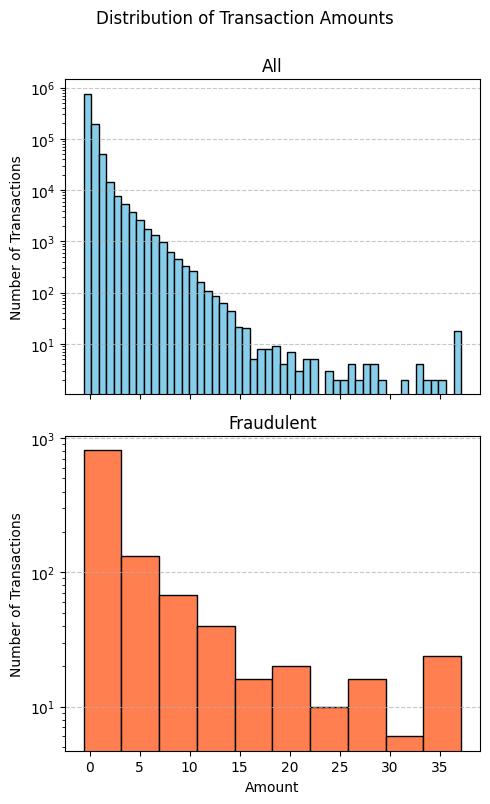

In [37]:
colors = sns.color_palette("pastel")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 8), sharex=True)

# Distribution of Transaction Amounts for all transactions
axes[0].hist(data['amount'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('All')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Distribution of Transaction Amounts for fraudulent transactions
axes[1].hist(data.loc[data['isFraud']==1]['amount'], bins=10, color='coral', edgecolor='black')
axes[1].set_title('Fraudulent')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle('Distribution of Transaction Amounts', y=1)
plt.tight_layout()
plt.show()

In [38]:
data.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [39]:
data['isFraud'] = data['isFraud'].astype(bool)
data['isFlaggedFraud'] = data['isFlaggedFraud'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   type             1048575 non-null  object 
 1   amount           1048575 non-null  float64
 2   oldbalanceOrg    1048575 non-null  float64
 3   newbalanceOrg    1048575 non-null  float64
 4   oldbalanceDest   1048575 non-null  float64
 5   newbalanceDest   1048575 non-null  float64
 6   isFraud          1048575 non-null  bool   
 7   isFlaggedFraud   1048575 non-null  bool   
 8   hour             1048575 non-null  int64  
 9   day              1048575 non-null  int64  
 10  nameOrig_length  1048575 non-null  int64  
 11  nameDest_length  1048575 non-null  int64  
 12  type_encoded     1048575 non-null  int32  
dtypes: bool(2), float64(5), int32(1), int64(4), object(1)
memory usage: 86.0+ MB


In [43]:
encoder = OneHotEncoder(sparse_output=False)

# Reshape the 'type' column to 2D array for encoder
type_col = data['type'].values.reshape(-1, 1)

encoded_cols = encoder.fit_transform(type_col)

# Reset the index of the data dataframe
data = data.reset_index(drop=True)

# Create a DataFrame from the encoded columns
df_encoded = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['type']))

# Drop the original 'type' column and concatenate the encoded DataFrame
encoded_data = data.drop(columns=['type'])
encoded_data = pd.concat([encoded_data, df_encoded], axis=1)


encoded_data.head()

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,nameOrig_length,nameDest_length,type_encoded,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.561738,-0.236855,-0.243832,-0.425883,-0.461062,False,False,1,1,11,11,3,0.0,0.0,0.0,1.0,0.0
1,-0.591840,-0.286956,-0.290673,-0.425883,-0.461062,False,False,1,1,11,11,3,0.0,0.0,0.0,1.0,0.0
2,-0.598194,-0.294045,-0.297117,-0.425883,-0.461062,True,False,1,1,11,10,4,0.0,0.0,0.0,0.0,1.0
3,-0.598194,-0.294045,-0.297117,-0.416661,-0.461062,True,False,1,1,10,9,1,0.0,1.0,0.0,0.0,0.0
4,-0.554837,-0.280123,-0.287183,-0.425883,-0.461062,False,False,1,1,11,11,3,0.0,0.0,0.0,1.0,0.0


In [44]:
# Split data into features and target
X = encoded_data.drop(columns=['isFraud'])
y = encoded_data['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
def run_model_and_evaluate(model, X_train, y_train, X_test, y_test):
    
    start_time = time.time()  # Start the timer

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
    
    # Stop the timer
    end_time = time.time()
    elapsed_time = end_time - start_time  # Calculate elapsed time in seconds

    # Evaluate classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities to compute ROC AUC
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    metrics_dict = {
        'running_time': elapsed_time,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Running Time: {elapsed_time:.2f} seconds")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)    

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Confusion matrix
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"], ax=axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix')

    # ROC curve
    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc='lower right')
    axes[1].grid(alpha=0.2)

    plt.tight_layout()
    plt.show()
    
    return metrics_dict

Running Time: 5.19 seconds
Accuracy: 0.9991178504160408
ROC AUC: 0.9401332444612607
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209487
        True       1.00      0.19      0.32       228

    accuracy                           1.00    209715
   macro avg       1.00      0.59      0.66    209715
weighted avg       1.00      1.00      1.00    209715



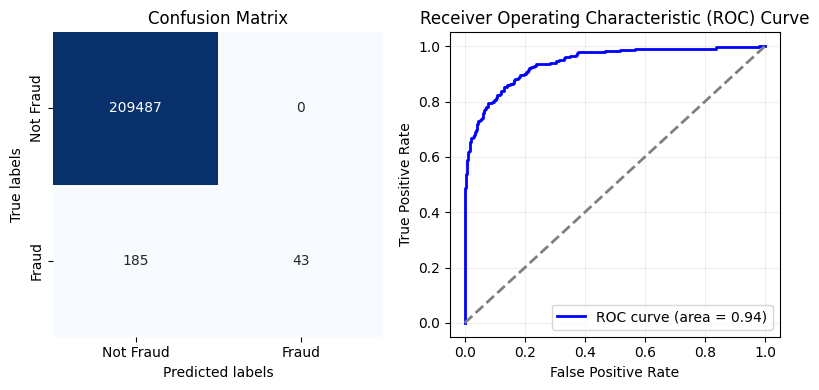

In [46]:
lr = run_model_and_evaluate(LogisticRegression(), X_train, y_train, X_test, y_test)

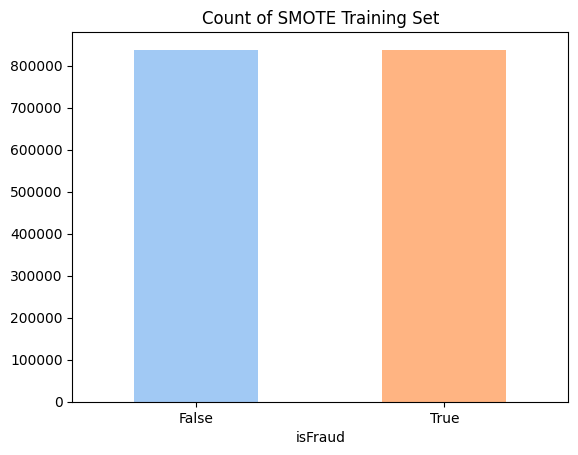

In [47]:
smote = SMOTE(random_state=42)
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

smote_df = pd.concat([X_train_smoted, y_train_smoted], axis=1).reset_index(drop=True)

# Checking the distribution of the target variable after SMOTE
smoted_distribution = y_train_smoted.value_counts()

smoted_distribution.plot(kind='bar', color=colors)
plt.title('Count of SMOTE Training Set')
plt.xticks(rotation=0)  # Rotate x-ticks by 90 degrees
plt.show()

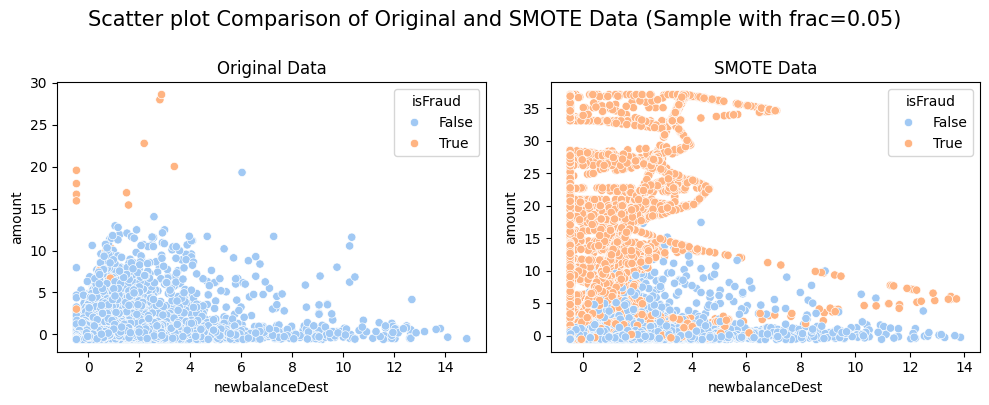

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

frac = 0.05 # Using a smaller fraction will reduce the execution time.

# First subplot
sns.scatterplot(x="newbalanceDest", y="amount", hue="isFraud", data=data.sample(frac=frac, random_state=42), palette="pastel", ax=axes[0])
axes[0].set_title("Original Data")

# Second subplot
sns.scatterplot(x="newbalanceDest", y="amount", hue="isFraud", data=smote_df.sample(frac=frac, random_state=42), palette="pastel", ax=axes[1])
axes[1].set_title("SMOTE Data")

# Main title
fig.suptitle('Scatter plot Comparison of Original and SMOTE Data (Sample with frac=0.05)', fontsize=15, y=1)
plt.tight_layout()
plt.show()


C:\Users\PUSHKARINEE BAPATHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running Time: 25.27 seconds
Accuracy: 0.9351930000238419
ROC AUC: 0.979816567774293
              precision    recall  f1-score   support

       False       1.00      0.94      0.97    209487
        True       0.02      0.92      0.03       228

    accuracy                           0.94    209715
   macro avg       0.51      0.93      0.50    209715
weighted avg       1.00      0.94      0.97    209715



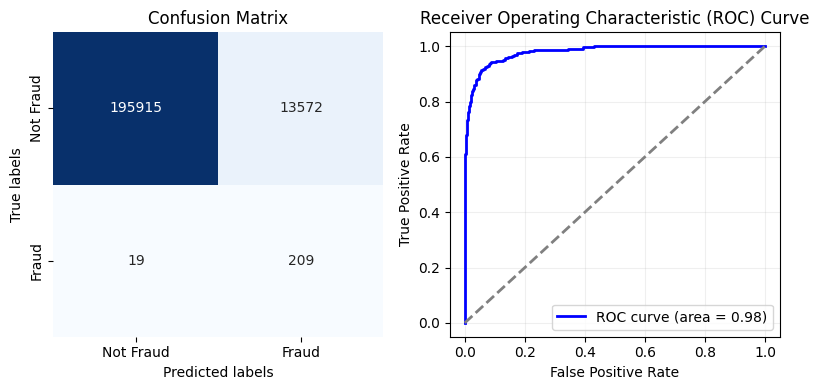

In [49]:
model = LogisticRegression(random_state=42, max_iter=100)
lr_smote = run_model_and_evaluate(model, X_train_smoted, y_train_smoted, X_test, y_test)

Running Time: 37.30 seconds
Accuracy: 0.999737739312877
ROC AUC: 0.9230946290767614
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209487
        True       0.98      0.77      0.86       228

    accuracy                           1.00    209715
   macro avg       0.99      0.89      0.93    209715
weighted avg       1.00      1.00      1.00    209715



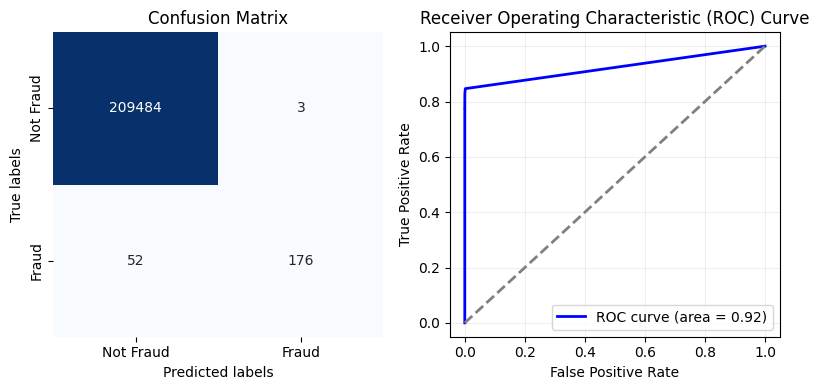

In [50]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
rf = run_model_and_evaluate(model, X_train, y_train, X_test, y_test)

Running Time: 77.18 seconds
Accuracy: 0.9991226187921703
ROC AUC: 0.9813927238628632
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    209487
        True       0.56      0.85      0.68       228

    accuracy                           1.00    209715
   macro avg       0.78      0.92      0.84    209715
weighted avg       1.00      1.00      1.00    209715



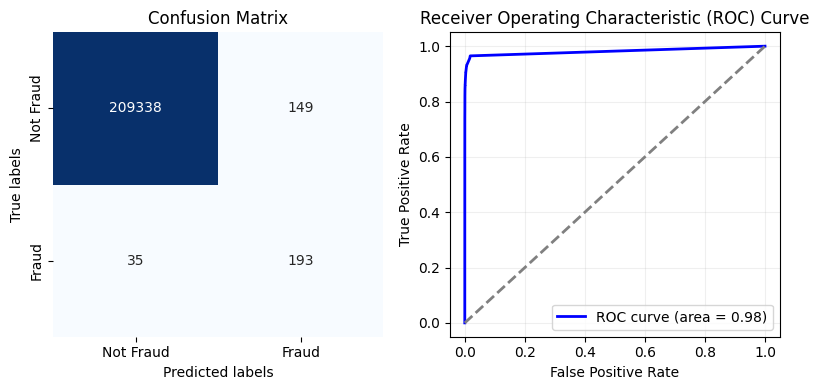

In [51]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_smote = run_model_and_evaluate(model, X_train_smoted, y_train_smoted, X_test, y_test)

In [52]:
result_df = pd.DataFrame([lr, lr_smote, rf, rf_smote], index=['LogisticRegression', 'LogisticRegression with SMOTE',
                                                              'RandomForest', 'RandomForest with SMOTE'])
result_df 

,running_time,accuracy,roc_auc,precision,recall,f1_score
LogisticRegression,5.188221,0.999118,0.940133,1.000000,0.188596,0.317343
LogisticRegression with SMOTE,25.268111,0.935193,0.979817,0.015166,0.916667,0.029838
RandomForest,37.296767,0.999738,0.923095,0.983240,0.771930,0.864865
RandomForest with SMOTE,77.175219,0.999123,0.981393,0.564327,0.846491,0.677193


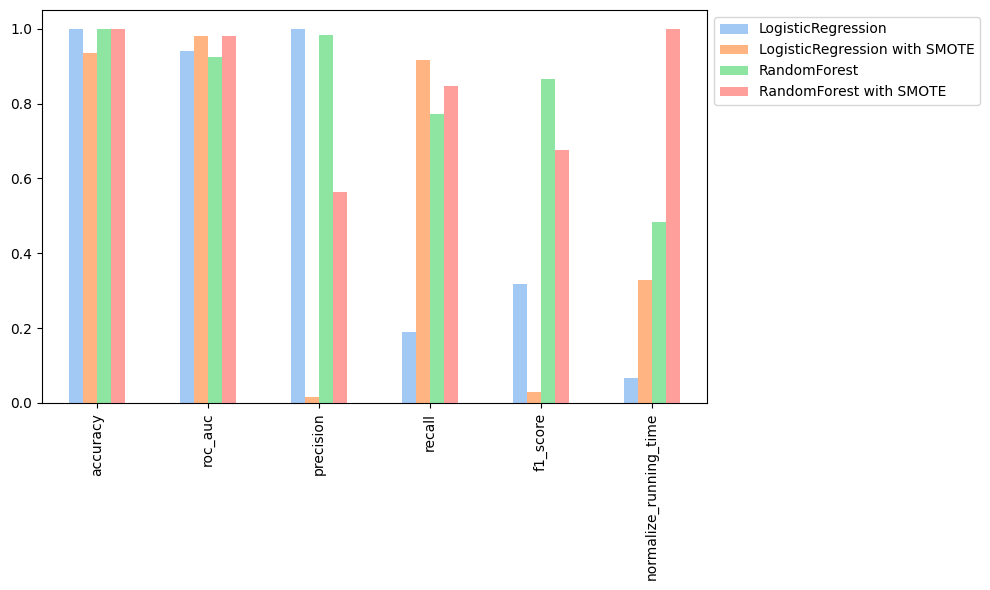

In [53]:
colors = sns.color_palette("pastel")

max_value = result_df['running_time'].max()
temp = result_df.copy()
temp['normalize_running_time'] = temp['running_time'] / max_value
temp.drop('running_time', inplace=True, axis=1)
temp = temp.T
ax = temp.plot(kind='bar', figsize=(10, 6), color=colors)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside of the plot
plt.tight_layout()
plt.show()


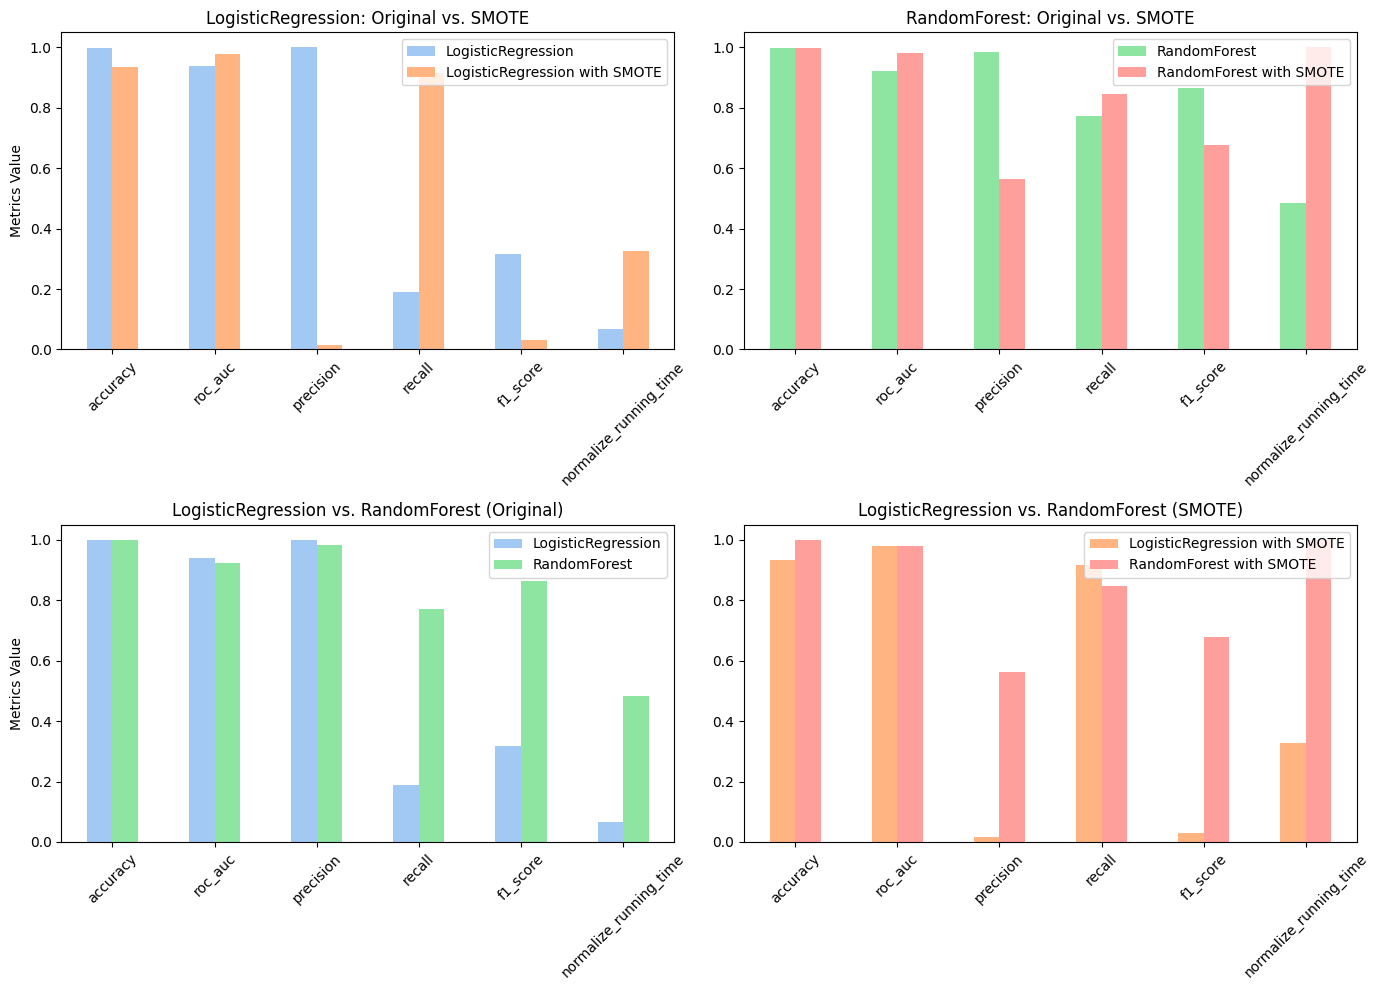

In [54]:
c = {
    'lr':'#a1c9f4',
    'lr_smote':'#ffb482',
    'rf':'#8de5a1',
    'rf_smote':'#ff9f9b',
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Comparing LogisticRegression model between normal and smote
temp[['LogisticRegression', 'LogisticRegression with SMOTE']].plot(kind='bar', color=[c['lr'], c['lr_smote']], ax=axes[0, 0])
axes[0, 0].set_title("LogisticRegression: Original vs. SMOTE")
axes[0, 0].set_ylabel("Metrics Value")
axes[0, 0].set_xticklabels(temp.index, rotation=45)

# 2. Compare RandomForest model between normal and smote 
temp[['RandomForest', 'RandomForest with SMOTE']].plot(kind='bar', color=[c['rf'], c['rf_smote']], ax=axes[0, 1])
axes[0, 1].set_title("RandomForest: Original vs. SMOTE")
axes[0, 1].set_xticklabels(temp.index, rotation=45)

# 3. Compare LogisticRegression model and RandomForest model normal
temp[['LogisticRegression', 'RandomForest']].plot(kind='bar', color=[c['lr'], c['rf']], ax=axes[1, 0])
axes[1, 0].set_title("LogisticRegression vs. RandomForest (Original)")
axes[1, 0].set_ylabel("Metrics Value")
axes[1, 0].set_xticklabels(temp.index, rotation=45)

# 4. compare LogisticRegression model and RandomForst model with smote
temp[['LogisticRegression with SMOTE', 'RandomForest with SMOTE']].plot(kind='bar', color=[c['lr_smote'], c['rf_smote']], ax=axes[1, 1])
axes[1, 1].set_title("LogisticRegression vs. RandomForest (SMOTE)")
axes[1, 1].set_xticklabels(temp.index, rotation=45)

plt.tight_layout()
plt.show()